In [1]:
import matplotlib.pylab as plt
import numpy as np
import cv2
import os
import json
import pathlib
from pycocotools.coco import COCO

In [2]:
coco = COCO("/data/food_recognition/train/annotations.json")

loading annotations into memory...
Done (t=6.09s)
creating index...
index created!


In [3]:
cat_ids = coco.getCatIds()
cats = coco.loadCats(cat_ids)
len(cats)

323

In [4]:
cats = list(map(lambda cat: (cat["id"], cat["name"]), cats))
cats

[(50, 'beetroot-steamed-without-addition-of-salt'),
 (101246, 'bread_wholemeal'),
 (100546, 'jam'),
 (101129, 'water'),
 (101243, 'bread'),
 (100133, 'banana'),
 (101306, 'soft_cheese'),
 (101126, 'ham_raw'),
 (101305, 'hard_cheese'),
 (100206, 'cottage_cheese'),
 (101178, 'coffee'),
 (101150, 'fruit_mixed'),
 (101185, 'pancake'),
 (101166, 'tea'),
 (100966, 'salmon_smoked'),
 (100078, 'avocado'),
 (100107, 'spring_onion_scallion'),
 (101181, 'ristretto_with_caffeine'),
 (101335, 'ham_n_s'),
 (100523, 'egg'),
 (101291, 'bacon'),
 (100063, 'chips_french_fries'),
 (101219, 'juice_apple'),
 (101308, 'chicken'),
 (100089, 'tomato'),
 (101183, 'broccoli'),
 (101279, 'shrimp_prawn'),
 (101188, 'carrot'),
 (101311, 'chickpeas'),
 (101214, 'french_salad_dressing'),
 (100321, 'pasta_hornli_ch'),
 (101275, 'sauce_cream'),
 (100319, 'pasta_n_s'),
 (100838, 'tomato_sauce'),
 (101302, 'cheese_n_s'),
 (101347, 'pear'),
 (100184, 'cashew_nut'),
 (100182, 'almonds'),
 (101282, 'lentil_n_s'),
 (101144,

In [5]:
def visualize_image_with_cat_id(cat_id, show_seg=False):
    image_ids = coco.getImgIds(catIds=[cat_id])
    image_info_list = coco.loadImgs(image_ids)
    cat_info = coco.loadCats([cat_id])[0]

    print(f"Category id: {cat_id}, category name: {cat_info['name']}")
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))

    indices = np.random.randint(len(image_info_list), size=10)

    for i, ind in enumerate(indices):
        image_info = image_info_list[ind]
        image_path = f"/data/food_recognition/train/images/{image_info['file_name']}"
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        axes[i//5, i%5].imshow(image)
        axes[i//5, i%5].axis("off")

    plt.tight_layout()
    plt.show()

    if show_seg is True:
        fig = plt.figure(figsize=(10, 4))

        for i, ind in enumerate(indices):
            image_info = image_info_list[ind]
            image_path = f"/data/food_recognition/train/images/{image_info['file_name']}"
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            ax = fig.add_subplot(2, 5, i + 1)
            plt.imshow(image)
            plt.axis("off")

            ann_ids = coco.getAnnIds([image_info["id"]])
            ann_info_list = coco.loadAnns(ann_ids)
            coco.showAnns(ann_info_list)

        plt.tight_layout()
        plt.show()

Category id: 100332, category name: bread_fruit


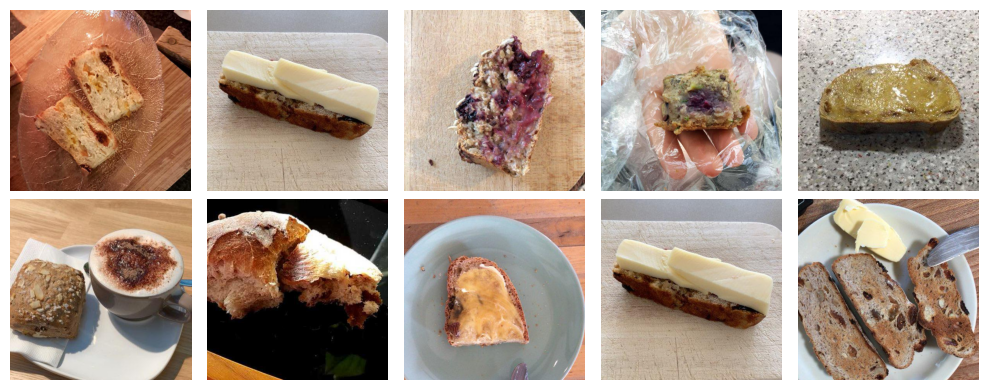

In [6]:
visualize_image_with_cat_id(100332)

Category id: 101246, category name: bread_wholemeal


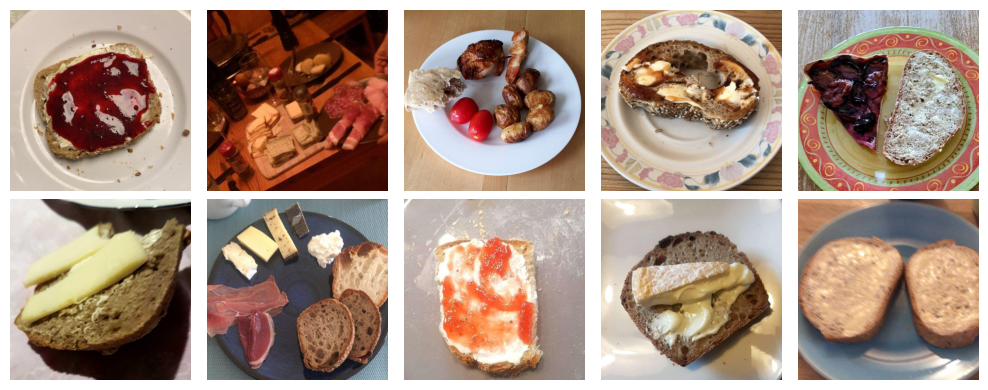

<Figure size 1000x400 with 0 Axes>

In [38]:
visualize_image_with_cat_id(101246)

Category id: 101248, category name: bread_grain


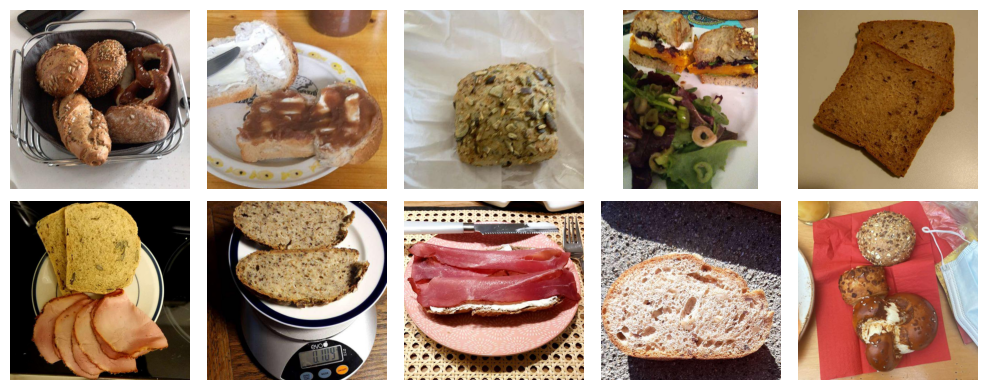

<Figure size 1000x400 with 0 Axes>

In [39]:
visualize_image_with_cat_id(101248)

Category id: 101255, category name: bread_white


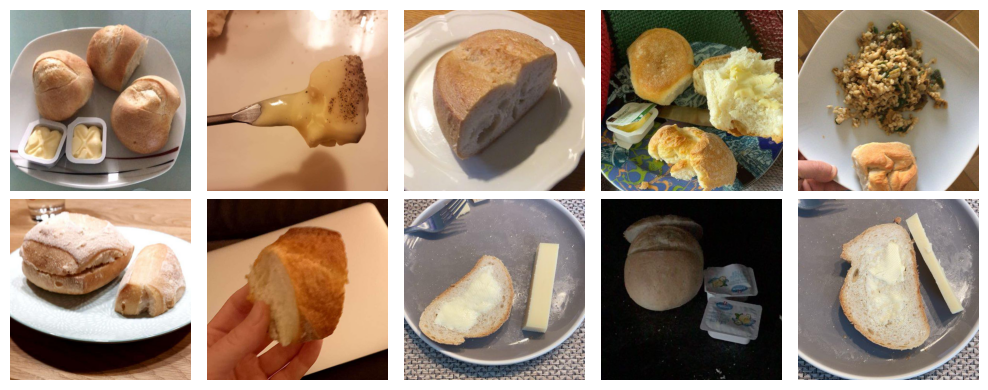

<Figure size 1000x400 with 0 Axes>

In [40]:
visualize_image_with_cat_id(101255)

Category id: 100993, category name: fajita_bread_only


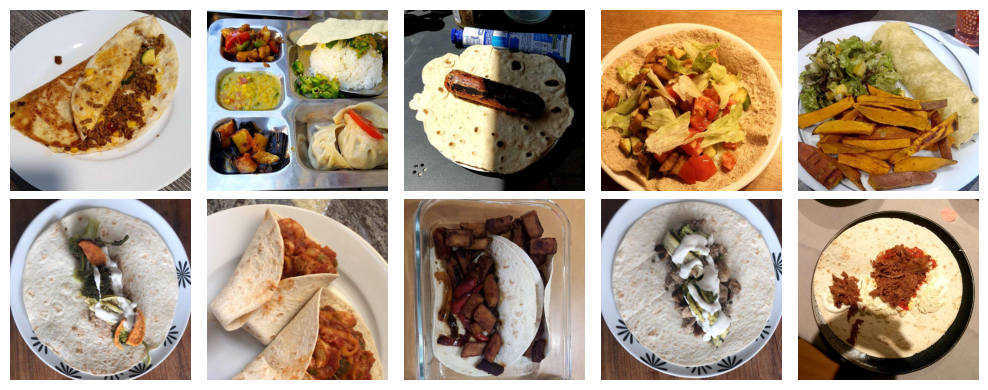

<Figure size 1000x400 with 0 Axes>

In [41]:
visualize_image_with_cat_id(100993)

Category id: 101254, category name: bread_whole_wheat


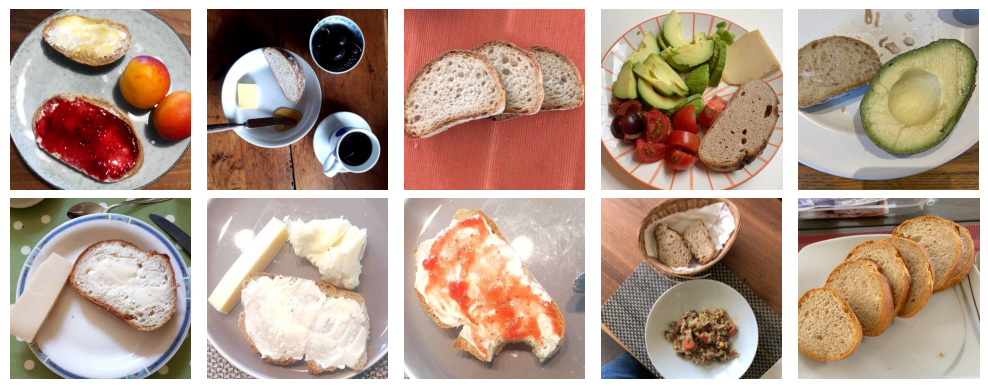

<Figure size 1000x400 with 0 Axes>

In [42]:
visualize_image_with_cat_id(101254)

Category id: 100333, category name: bread_pita


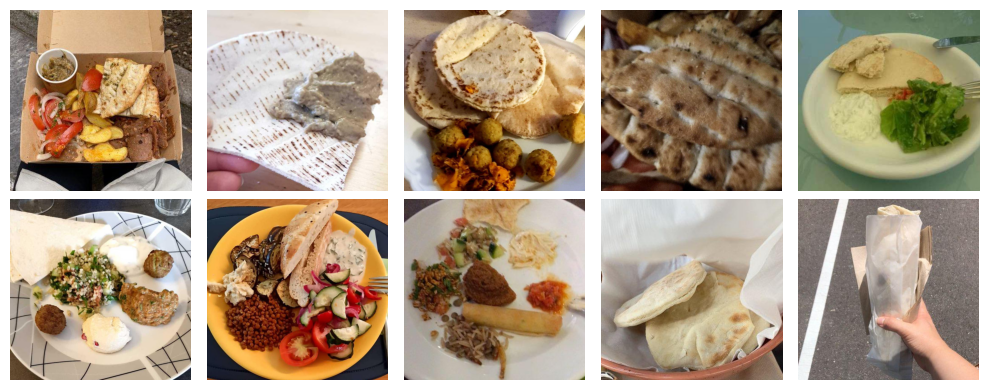

In [44]:
visualize_image_with_cat_id(100333)

In [7]:
simple_label_map = {
    "food": {
        "bread_wholemeal": "bread",
        "bread_grain": "bread",
        "bread_white": "bread",
        "bread_whole_wheat": "bread",
        "bread_toast": "bread",
        "crisp_bread": "bread",
        "bread_black": "bread",
        "bread_fruit": "bread",
        "bread_rye": "bread",
        "bread": "bread",
        "banana": "banana",
        "soft_cheese": "cheese",
        "ham_raw": "ham",
        "hard_cheese": "cheese",
        "pancake": "pancake",
        "salmon_smoked": "salmon",
        "avocado": "avocado",
        "spring_onion_scallion": "vegetables",
        "ham_n_s": "ham",
        "egg": "egg",
        "bacon": "bacon",
        "chips_french_fries": "french fries",
        "chicken": "chicken",
        "tomato": "tomato",
        "broccoli": "broccoli",
        "shrimp_prawn": "shrimp",
        "carrot": "carrot",
        "chickpeas": "chickpeas",
        "pasta_hornli_ch": "hornli pasta",
        "pasta_n_s": "pasta",
        "cheese_n_s": "cheese",
        "pear": "pear",
        "cashew_nut": "nuts",
        "almonds": "nuts",
        "lentil_n_s": "nuts",
        "mixed_vegetables": "vegetables",
        "peanut_butter": "butter",
        "apple": "apple",
        "blueberries": "blueberries",
        "cucumber": "cucumber",
        "yogurt": "yogurt",
        "butter": "butter",
        "soup": "soup",
        "sausage": "sausage",
        "pizza_margherita_baked": "pizza",
        "salami_ch": "ham",
        "mushroom": "mushroom",
        "tart_n_s": "tart",
        "rice": "rice",
        "sunflower_seeds": "seeds",
        "bell_pepper_red_raw": "red bell pepper",
        "zucchini": "zucchini", #
        "asparagus": "asparagus", #
        "lye_pretzel_soft": "pretzel",
        "curry_vegetarian": "curry",
        "salmon": "salmon",
        "orange": "orange",
        "pasta_noodles": "pasta",
        "cream_double_cream_heavy_cream_45": "cream",
        "cake_chocolate": "chocolate cake",
        "pasta_spaghetti": "pasta",
        "black_olives": "black olives",
        "parmesan": "parmesan",
        "salad_lambs_ear": "vegetables",
        "salad_leaf_salad_green": "vegetables",
        "potato": "potato",
        "white_cabbage": "cabbage",
        "bread_grain": "bread",
        "cheese_for_raclette_ch": "cheese",
        "bread_white": "bread",
        "quiche": "pie",
        "beef_n_s": "beef",
        "mozzarella": "mozzarella",
        "mandarine": "mandarine",
        "kiwi": "kiwi",
        "french_beans": "vegetables",
        "spring_roll_fried": "fried spring roll",
        "leaf_spinach": "vegetables",
        "tuna": "tuna",
        "dark_chocolate": "chocolate",
        "kaki": "kaki",
        "nuggets": "nuggets",
        "veggie_burger": "hamburger",
        "chinese_cabbage": "cabbage",
        "hamburger": "hamburger",
        "soup_pumpkin": "soup",
        "sushi": "sushi",
        "chestnuts_ch": "nuts",
        "leek": "vegetables",
        "onion": "onion",
        "garlic": "garlic",
        "pizza_with_vegetables_baked": "pizza",
        "peanut": "nuts",
        "green_olives": "green olives",
        "egg_scrambled": "egg scrambled",
        "hazelnut": "nuts",
        "figs": "figs",
        "pumpkin": "pumpkin",
        "red_cabbage_raw": "red cabbage",
        "biscuit": "cookies",
        "honey": "honey",
        "brownie": "bread",
        "ice_cream_n_s": "icecream",
        "dried_meat_n_s": "dried meat",
        "mixed_salad_chopped_without_sauce": "vegetables",
        "walnut": "nuts",
        "potato_salad": "potato salad",
        "kolhrabi": "vegetables",
        "alfa_sprouts": "vegetables",
        "gruyere_ch": "cheese",
        "grapes": "grapes",
        "chocolate_egg_small": "egg chocolate",
        "mango": "mango",
        "spinach": "vegetables",
        "fish_n_s": "fish",
        "risotto": "risotto",
        "crisps_ch": "crisps",
        "pork_n_s": "pork",
        "pomegranate": "pomegranate",
        "sweet_corn": "corn",
        "flakes": "flakes",
        "greek_salad": "vegatables",
        "sesame_seeds": "seeds",
        "baked_potato": "potato",
        "fennel": "vegetables",
        "meat_n_s": "meat",
        "croutons": "bread",
        "bell_pepper_red_stewed": "red bell pepper",
        "nuts": "nuts",
        "fondue": "fondue",
        "strawberries": "strawberries",
        "red_radish": "red radish",
        "beans_kidney": "nuts",
        "country_fries": "country fries",
        "pasta_linguini_parpadelle_tagliatelle": "pasta",
        "cookies": "cookies",
        "semi_hard_cheese": "cheese",
        "corn": "corn",
        "dates": "dates",
        "pistachio": "nuts",
        "goat_cheese_soft": "cheese",
        "grapefruit_pomelo": "pomelo",
        "tofu": "tofu",
        "cordon_bleu": "cordon bleu",
        "salad_rocket": "vegetables",
        "pizza_with_ham_with_mushrooms_baked": "pizza",
        "plums": "plums",
        "pizza_with_ham_baked": "pizza",
        "pineapple": "pineapple",
        "seeds_n_s": "seeds",
        "focaccia": "bread",
        "coleslaw_chopped_without_sauce": "coleslaw",
        "chicken_leg": "chicken leg",
        "croissant": "croissant",
        "cheesecake": "cheese cake",
        "croissant_with_chocolate_filling": "croissant",
        "pumpkin_seeds": "seeds",
        "artichoke": "artichoke",
        "white_bread_with_butter_eggs_and_milk": "bread",
        "savoury_pastry_stick": "cheese stick",
        "tuna_in_oil_drained": "tuna",
        "falafel_balls": "falafel",
        "berries_n_s": "berries",
        "mixed_seeds_n_s": "seeds",
        "lemon": "lemon",
        "chocolate_cookies": "cookies",
        "muffin": "muffin",
        "pine_nuts": "nuts",
        "french_pizza_from_alsace_baked": "pizza",
        "chocolate_n_s": "chocolate",
        "raspberries": "raspberries",
        "roll_with_pieces_of_chocolate": "bread",
        "cake_lemon": "bread",
        "rice_wild": "rice",
        "gluten_free_bread": "bread",
        "pearl_onion": "onion",
        "ham_croissant_ch": "croissant",
        "corn_crisps": "corn crisps",
        "rice_whole_grain": "rice",
        "cervelat_ch": "sausage",
        "peas": "nuts",
        "tiramisu": "tiramisu",
        "apricots": "apricots",
        "brioche": "bread",
        "basil": "vegetables",
        "pie_apricot": "pie",
        "damson_plum": "plum",
        "shoots_n_s": "vegetables",
        "coconut": "coconut",
        "banana_cake": "banana cake",
        "white_asparagus": "white asparagus",
        "cherries": "cherries",
        "nectarine": "peach",
    },
    "drink": {
        "water": "water",
        "tea": "tea",
        "ristretto_with_caffeine": "coffee",
        "coffee": "coffee",
        "juice_apple": "apple juice",
        "wine_red": "red wine",
        "ice_tea_on_black_tea_basis": "tea",
        "smoothie": "smoothie",
        "beer": "beer",
        "water_with_lemon_juice": "lemon juice",
        "espresso": "coffee",
        "juice_orange": "orange juice",
        "cappuccino": "coffee",
        "chocolate_milk": "chocolate milk",
        "mixed_milk_beverage": "milk beverage",
        "latte_macchiato": "coffee",
        "wine_rose": "wine",
        "white_coffee": "coffee",
        "wine_white": "wine",
        "cola_based_drink": "cola",

    }
}

with open("simple_label_map.json", "w") as f:
    json.dump(simple_label_map, f)



In [8]:
new_simple_label_map = dict()

catid_list = list(map(lambda item: item[0], cats))
cat_list = list(map(lambda item: item[1], cats))

for large_cat in simple_label_map:
    for cat in simple_label_map[large_cat]:
        catid = catid_list[cat_list.index(cat)]
        new_simple_label_map[cat] = (simple_label_map[large_cat][cat], catid, large_cat)

In [11]:
with open("simple_label_map.json", "w") as f:
    json.dump(new_simple_label_map, f)

Category id: 100140, category name: dates


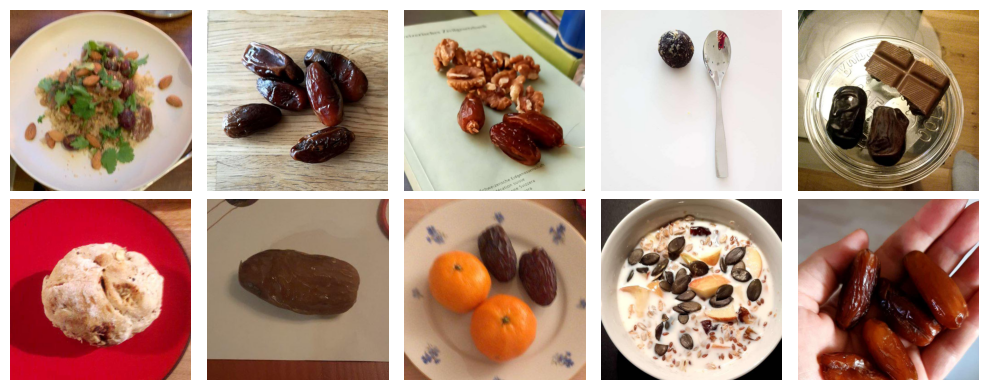

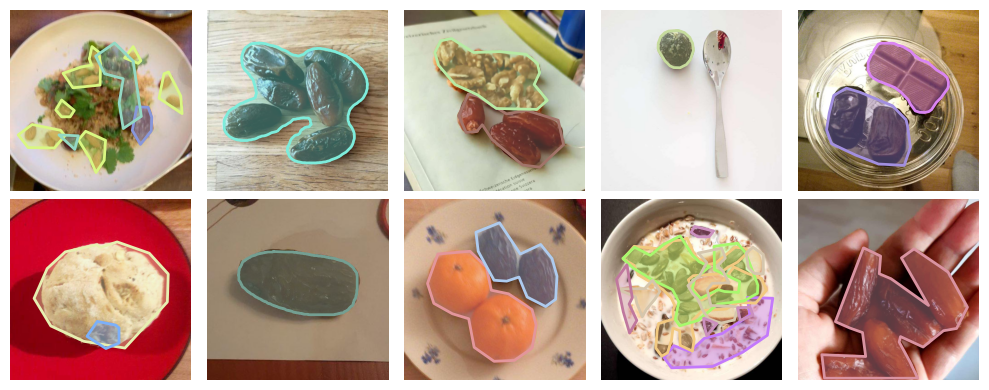

In [101]:
visualize_image_with_cat_id(100140, show_seg=True)

In [8]:
# labels = [
#     "jam", "water", "bread", "banana",
#     "cheese", "coffee", "pancake", "tea",
#     "salmon", "avocado", "pancake", "ham",
#     "egg", "bacon", "french fries", "apple juice",
#     "chicken", "tomato", "broccoli", "shrimp",
#     "carrot", "chickpeas", "salad_dressing", "shrimp",
# ]

label_map = {
    "bread_wholemeal": "bread",
    "bread_grain": "bread",
    "bread_white": "bread",
    "fajita_bread_only": "fajita bread",
    "bread_whole_wheat": "bread",
    "bread_pita": "pita bread",
    "bread_toast": "bread",
    "crisp_bread": "crisp bread",
    "bread_black": "bread",
    "bread_fruit": "bread",
    "bread_rye": "bread",
    "bread_wholemeal_toast": "bread",
    "bread_ticino_ch": "bread",
    "white_bread_with_butter_eggs_and_milk": "bread",
    "gluten_free_bread": "bread",
    "soft_cheese": "cheese",
    "hard_cheese": "cheese",
    "cottage_cheese": "cheese",
    "emmental_cheese_ch": "cheese",
    "fresh_cheese_n_s": "cheese",
    "semi_hard_cheese": "cheese",
    "cream_cheese_n_s": "cheese",
    "goat_cheese_soft": "cheese",
    "blue_mould_cheese": "cheese",
    "fruit_mixed": "fruit",
    "salmon_smoked": "smoked salmon",
    "ristretto_with_caffeine": "coffee", # ristretto
    "spring_onion_scallion": "vegetables", # mixed vegetables
    "ham_n_s": "ham",
    "chips_french_fries": "french fries",
    "juice_apple": "apple juice",
    "shrimp_prawn": "shrimp",
    "french_salad_dressing": "salad dressing",
    "pasta_hornli_ch": "hornli pasta",
    "sauce_cream": "cream sauce",
    "pasta_n_s": "pasta",
    "tomato_sauce": "tomato sauce",
    "cashew_nut": "cashew nut",
    "lentil_n_s": "lentil",
    "mixed_vegetables": "vegetables",
    "peanut_butter": "butter",
    "wine_red": "red wine",
    "wine_white": "white wine",
    "pizza_margherita_baked": "pizza",
    "salami_ch": "ham",
    "tart_n_s": "tart",
    "white_coffee": "coffee",
    "sunflower_seeds": "seeds",
    "bell_pepper_red_raw": "red bell pepper",
    "tartar_sauce": "tartar sauce",
    "lye_pretzel_soft": "pretzel",
    "cucumber_pickled_ch": "pickled cucumber",
    "soup_of_lentils_dahl_dhal": "pizza",
    "pasta_noodles": "pasta",
    "cream_double_cream_heavy_cream_45": "cream",
    "cake_chocolate": "chocolate cake",
    "pasta_spaghetti": "pasta",
    "black_olives": "black olives",
    "salad_lambs_ear": "salad",
    "salad_leaf_salad_green": "salad",
    "white_cabbage": "white cabbage",
    "beetroot_raw": "beetroot",
    "curds_natural": "curds",
    "beef_n_s": "beef",
    "taboule_prepared_with_couscous": "couscous",
    "aubergine_eggplant": "eggplant",
    "lasagne_vegetable_prepared": "lasagne",
    "spring_roll_fried": "fried spring roll",
    "caprese_salad_tomato_mozzarella": "tomato with cheese",
    "leaf_spinach": "leaf spinach",
    "roll_of_half_white_or_white_flour_with_large_void": "bread",
    "omelette_with_flour_thick_crepe_plain": "omelette",
    "dark_chocolate": "dark chocolate",
    "sauce_savoury_n_s": "savoury sauce",
    "raisins_dried": "raisins",
    "ice_tea_on_black_tea_basis": "ice tea",
    "crepe_with_flour_plain": "crepe",
    "veggie_burger": "burger",
    "chinese_cabbage": "cabbage",
    "soup_pumpkin": "pumpkin soup",
    "chestnuts_ch": "chestnuts",
    "sauce_soya": "soya sauce",
    "balsamic_salad_dressing": "salad dressing",
    "pasta_twist": "twist pasta",
    "bolognaise_sauce": "bolognaise sauce",
    "potato_gnocchi": "gnocchi",
    "rice_noodles_vermicelli": "rice noodles",
    "pizza_with_vegetables_baked": "pizza",
    "green_olives": "green olives",
    "pasta_wholemeal": "pasta",
    "sauce_pesto": "pesto sauce",
    "water_with_lemon_juice": "lemon juice",
    "egg_scrambled": "egg scrambled",
    "juice_orange": "orange juice",
    "braided_white_loaf_ch": "bread",
    "hazelnut_chocolate_spread_nutella_ovomaltine_caotina": "chocolate sauce",
    "tomme_ch": "cheese",
    "mashed_potatoes_prepared_with_full_fat_milk_with_butter": "mashed potatoes",
    "swiss_chard": "chard",
    "red_cabbage_raw": "red cabbage",
    "spinach_raw": "spinach",
    "crunch_muesli": "muesli",
    "chicken_curry_cream_coconut_milk_curry_spices_paste": "curry",
    "meatloaf_ch": "meatloaf",
    "vegetable_mix_peas_and_carrots": "vegetables",
    "ice_cream_n_s": "ice cream",
    "salad_dressing": "salad dressing",
    "dried_meat_n_s": "dried meat",
    "chicken_breast": "chicken breast",
    "mixed_salad_chopped_without_sauce": "salad",
    "praline_n_s": "praline",
    "potato_salad": "potato",
    "alfa_sprouts": "alfa sprouts",
    "brussel_sprouts": "brussel sprouts",
    "gruyere_ch": "cheese",
    "chocolate_egg_small": "chocolate egg",
    "rosti_n_s": "rosti",
    "muesli_dry": "muesli",
    "fish_n_s": "fish",
    "crisps_ch": "crisps",
    "pork_n_s": "pork",
    "sweet_corn": "corn",
    "greek_salad": "salad",
    "sesame_seeds": "sesame",
    "baked_potato": "potato",
    "meat_n_s": "meat",
    "bell_pepper_red_stewed": "bell pepper",
    "pie_plum_baked_with_cake_dough": "pie",
    "potatoes_au_gratin_dauphinois_prepared": "potato",
    "red_radish": "red radish",
    "fruit_tart": "fruit tart",
    "beans_kidney": "kidney beans",
    "country_fries": "country fries",
    "pasta_linguini_parpadelle_tagliatelle": "pasta",
    "chicken_cut_into_stripes_only_meat": "chicken",
    "sun_dried_tomatoe": "tomato",
    "porridge_prepared_with_partially_skimmed_milk": "porridge",
    "chocolate_milk": "chocolate milk",
    "witloof_chicory": "chicory",
    "goat_cheese_soft": "cheese",
    "grapefruit_pomelo": "pomelo",
    "cordon_bleu": "cordon_bleu",
    "kefir_drink": "kefir drink",
    "salad_rocket": "salad",
    "pizza_with_ham_with_mushrooms_baked": "pizza with ham and mushrooms",
    "fruit_coulis": "coulis",
    "pizza_with_ham_baked": "pizza with ham",
    "seeds_n_s": "seeds",
    "mixed_milk_beverage": "milk beverage",
    "coleslaw_chopped_without_sauce": "chopped coleslaw",
    "sweet_potato": "potato",
    "chicken_leg": "chicken leg",
    "sauce_cocktail": "cocktail sauce",
    "croissant_with_chocolate_filling": "croissant with chocolate filling",
    "pumpkin_seeds": "seeds",
    "apple_pie": "apple pie",
    "savoury_pastry_stick": "cheese stick",
    "tuna_in_oil_drained": "tuna",
    "falafel_balls": "falafel",
    "berries_n_s": "berries",
    "latte_macchiato": "coffee",
    "sugar_melon_galia_honeydew_cantaloupe": "melon",
    "mixed_seeds_n_s": "seeds",
    "oil_vinegar_salad_dressing": "salad dressing",
    "chocolate_mousse": "chocolate mousse",
    "chocolate_cookies": "chocolate cookies",
    "birchermuesli_prepared_no_sugar_added": "birchermuesli",
    "pine_nuts": "pine nuts",
    "french_pizza_from_alsace_baked": "pizza",
    "chocolate_n_s": "chocolate",
    "grits_polenta_maize_flour": "chocolate",
}

exclude_cat_ids = [
    100360,
    101302,
    100249,
    100022,
    101043,
    100962,
    100974,
    101273,
    101327,
    100467,
]

In [2]:
import json
import numpy as np

with open("simple_label_map.json", "r") as f:
    label_map = json.load(f)

new_cat_names = list(map(lambda item: item[0], label_map.values()))

new_cat_names = np.unique(new_cat_names)
new_cat_names = np.sort(new_cat_names)

large_cat_map = dict()
for item in label_map.values():
    large_cat_map[item[0]] = item[2]


In [3]:
with open("cat_text.txt", "w") as f:
    for cat_name in new_cat_names:
        f.write(f"A photo of {large_cat_map[cat_name]} for {cat_name}.\n")